<a href="https://colab.research.google.com/github/jialun1221/scRNA-seq/blob/main/Experiment_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Note**: notebook is mainly used for feature importance experiments.  

###**A-Import**

In [ ]:
!pip3 install scanpy
import numpy as np
import pandas as pd
import scanpy as sc
import random
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import importlib
required_libraries = ['torch', 'torchvision', 'PIL', 'matplotlib',
                      'numpy', 'pandas']
# for lib in required_libraries:
#     if importlib.util.find_spec(lib) is None:
#         print("%s unavailable" % lib)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import TensorDataset

In [ ]:
#0. Model methods import
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

adata_m1 = sc.read_h5ad("drive/MyDrive/scRNA ML classifier/data_objects_May_2022/PC_all_genes_qc.h5ad")
adata_m2 = sc.read_h5ad("drive/MyDrive/scRNA ML classifier/data_objects_May_2022/PC_HVGs_qc.h5ad")
adata_m3 = sc.read_h5ad("drive/MyDrive/scRNA ML classifier/data_objects_May_2022/no_PC_HVGs_qc.h5ad")

data_list = [adata_m1, adata_m2, adata_m3]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Model Definition**

In [ ]:
#0. Define Logistic Regression Model
def randomForestTest():

  use_gpu = torch.cuda.is_available()
  device = torch.device("cuda:0" if use_gpu else "cpu")

  forest = RandomForestClassifier(random_state=0,n_estimators = 100)
  forest.fit(X_train, y_train)

  prediction_test = forest.predict(X_test_global)

  #test accruacy
  accuracy_test = accuracy_score(y_test_global, prediction_test)
  print("Test acc = ", accuracy_test)

  return prediction_test, accuracy_test, forest

In [ ]:
def plot(y_test, prediction_test):
  confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)
  cmd = ConfusionMatrixDisplay(confusion_matrix, display_labels=['Healthy','PD'])
  cmd.plot(cmap = 'YlGnBu', colorbar = False)

  plt.grid(False)

  fig = cmd.ax_.get_figure()
  fig.set_figwidth(3)
  fig.set_figheight(3)
  plt.rcParams["figure.dpi"] = 500
  plt.rcParams["axes.labelcolor"] = 'black' #now useless

  plt.rc('font', size=16)
  # Set the axes title font size
  plt.rc('axes', titlesize=14)
  # Set the axes labels font size
  plt.rc('axes', labelsize=14)
  # Set the font size for x tick labels
  plt.rc('xtick', labelsize=14)
  # Set the font size for y tick labels
  plt.rc('ytick', labelsize=14)
  #plt.savefig(dpi = 300, fname = 'astro_LR.png')

###**Experiment 1. Random Forest Importance in Astrocytes (method 1)**

Test acc =  0.9886091127098321


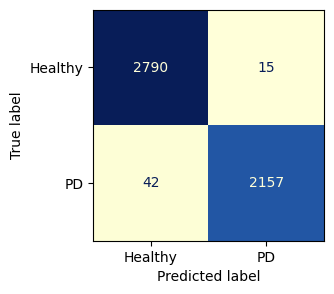

In [ ]:
if 'X_pca' in adata_m1.obsm:
  X = pd.DataFrame(adata_m1.obsm['X_pca'].X)
else:
  X = adata_m1.X

y = adata_m1.obs['disease__ontology_label'].replace({"normal": "0", "Parkinson disease": "1"})

#2. Train-test split: 60/20/20. Random_state is the seed.Validation used for hyperparameter tuning.
#   Parameters for the highest accuracy can be used for test set.

X_train, X_test_global, y_train, y_test_global = train_test_split(X, y, test_size=0.2, random_state=0) #test is always the same
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

prediction_test, accuracy_test, forest = randomForestTest()
plot(y_test_global, prediction_test)

**feature importance YouTube**

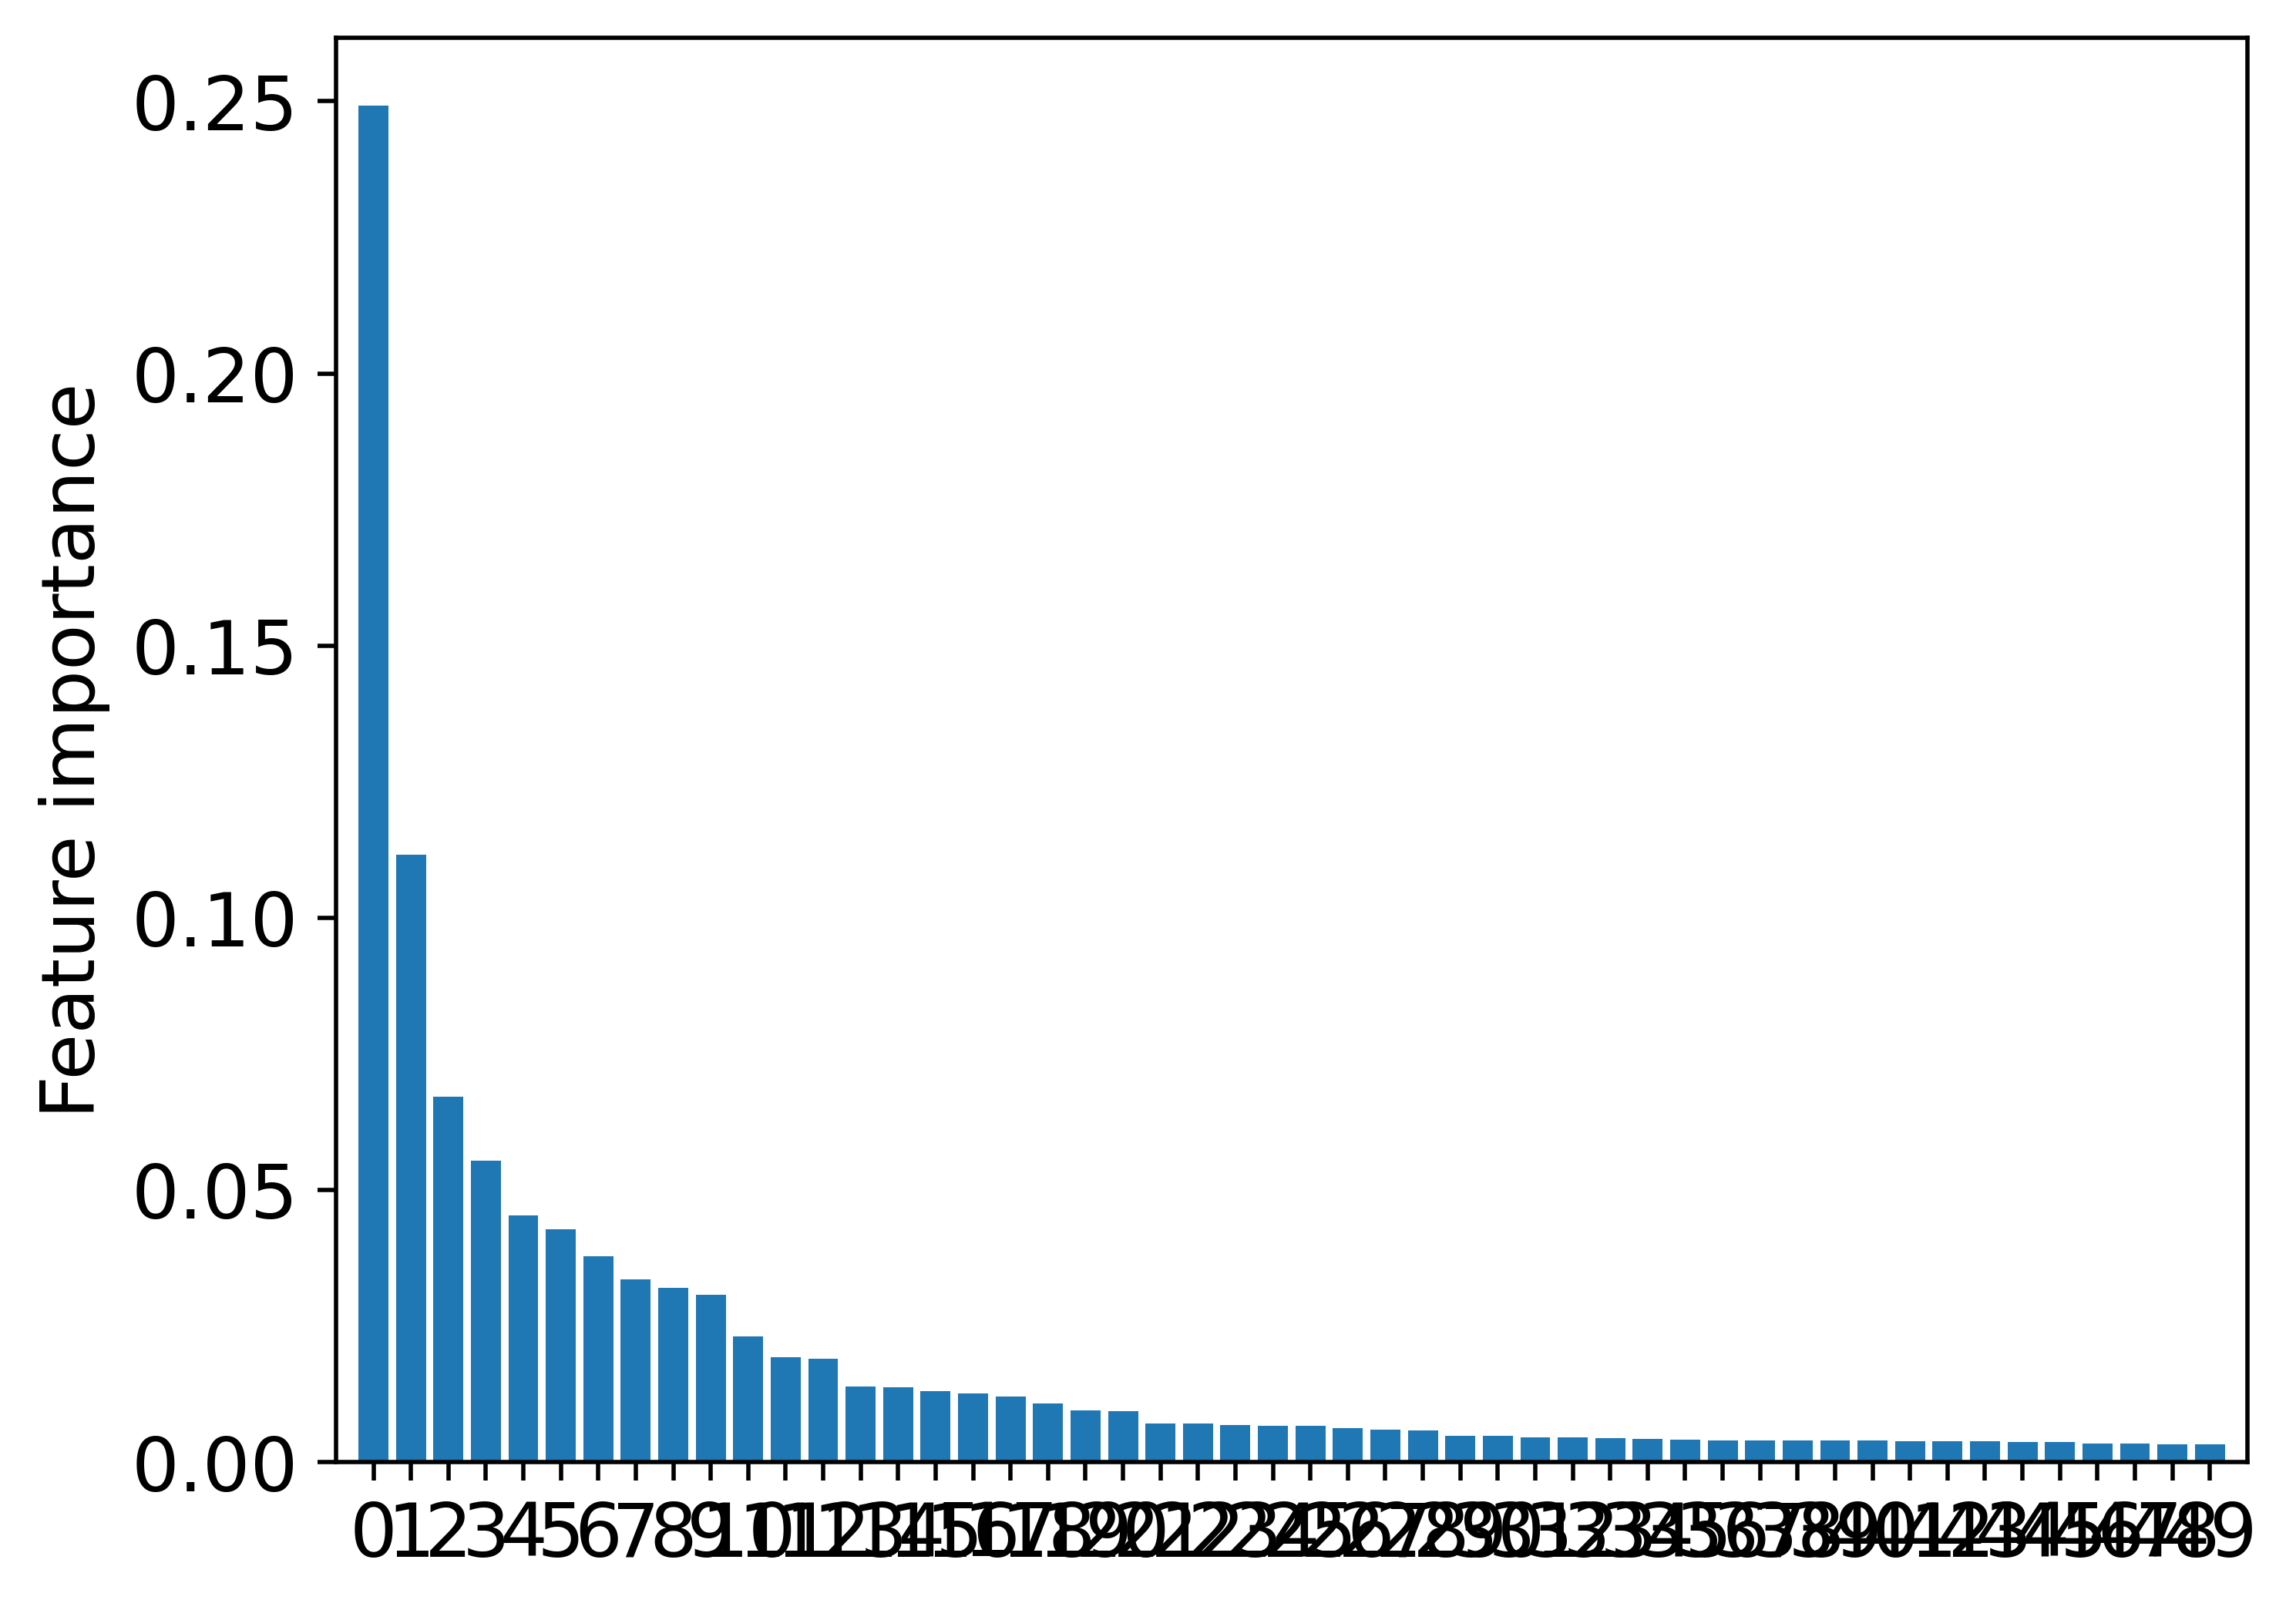

In [ ]:
'''not good '''
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

plt.ylabel('Feature importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

feat_labels = [f"feature {i+1}" for i in range(X.shape[1])]
plt.xticks(range(X_train.shape[1]),
            rotation=0)

plt.xlim([-1, X_train.shape[1]])

# plt.tight_layout()
plt.savefig('feature-importance.pdf', dpi=300)
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
forest.feature_importances_

array([0.24915787, 0.04538757, 0.06721471, 0.05539373, 0.11162881,
       0.03198195, 0.0427673 , 0.00941563, 0.01301971, 0.02309605,
       0.03082494, 0.00719543, 0.01264392, 0.01378542, 0.0378614 ,
       0.00710373, 0.01209004, 0.00493864, 0.01077598, 0.00953214,
       0.01928418, 0.03355134, 0.00632323, 0.01385906, 0.00480505,
       0.00590758, 0.01906461, 0.00461743, 0.00600446, 0.00408277,
       0.00384214, 0.00675215, 0.00683033, 0.00393719, 0.00438614,
       0.00462053, 0.00376405, 0.00401687, 0.00393472, 0.00668556,
       0.00427128, 0.00342064, 0.00420247, 0.00401305, 0.00407498,
       0.00333447, 0.00405275, 0.00373769, 0.00342856, 0.00337976])

In [ ]:
feature_names = [f"PC {i+1}" for i in range(X.shape[1])]
print(feature_names)

['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 'PC 13', 'PC 14', 'PC 15', 'PC 16', 'PC 17', 'PC 18', 'PC 19', 'PC 20', 'PC 21', 'PC 22', 'PC 23', 'PC 24', 'PC 25', 'PC 26', 'PC 27', 'PC 28', 'PC 29', 'PC 30', 'PC 31', 'PC 32', 'PC 33', 'PC 34', 'PC 35', 'PC 36', 'PC 37', 'PC 38', 'PC 39', 'PC 40', 'PC 41', 'PC 42', 'PC 43', 'PC 44', 'PC 45', 'PC 46', 'PC 47', 'PC 48', 'PC 49', 'PC 50']


In [ ]:
# Print feature importances in the order of feature names
for feature_name, importance in zip(feature_names, importances):
    print(f"{feature_name}: {importance}")

NameError: ignored

In [ ]:
# List1
name = feature_names
# List2
imp = forest.feature_importances_

# get the list of tuples from two lists.
# and merge them by using zip().
list_of_tuples = list(zip(name, imp))

# Assign data to tuples.
list_of_tuples
df = pd.DataFrame(list_of_tuples, columns = ['Feature', 'forest.feature_importances_'])

# Print data.
df

Feature  forest.feature_importances_
0     PC 1                     0.249158
1     PC 2                     0.045388
2     PC 3                     0.067215
3     PC 4                     0.055394
4     PC 5                     0.111629
5     PC 6                     0.031982
6     PC 7                     0.042767
7     PC 8                     0.009416
8     PC 9                     0.013020
9    PC 10                     0.023096
10   PC 11                     0.030825
11   PC 12                     0.007195
12   PC 13                     0.012644
13   PC 14                     0.013785
14   PC 15                     0.037861
15   PC 16                     0.007104
16   PC 17                     0.012090
17   PC 18                     0.004939
18   PC 19                     0.010776
19   PC 20                     0.009532
20   PC 21                     0.019284
21   PC 22                     0.033551
22   PC 23                     0.006323
23   PC 24                     0.013859
24   PC 25                     0.004805
25   PC 26                     0.005908
26   PC 27                     0.019065
27   PC 28                     0.004617
28   PC 29                     0.006004
29   PC 30                     0.004083
30   PC 31                     0.003842
31   PC 32                     0.006752
32   PC 33                     0.006830
33   PC 34                     0.003937
34   PC 35                     0.004386
35   PC 36                     0.004621
36   PC 37                     0.003764
37   PC 38                     0.004017
38   PC 39                     0.003935
39   PC 40                     0.006686
40   PC 41                     0.004271
41   PC 42                     0.003421
42   PC 43                     0.004202
43   PC 44                     0.004013
44   PC 45                     0.004075
45   PC 46                     0.003334
46   PC 47                     0.004053
47   PC 48                     0.003738
48   PC 49                     0.003429
49   PC 50                     0.003380

This part of code looks at feature importances using the scikit learn method.

---

**Feature importance based on mean decrease in impurity**: This approach directly measures feature importance by observing how random re-shuffling (thus preserving the distribution of the variable) of each predictor influences model performance.

In [ ]:
index = X.columns
print(index) #feature name is a list of indexes

RangeIndex(start=0, stop=50, step=1)


In [ ]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.023 seconds


This part of code ranks the 50 PCs from least important to most important. You can compare this with the plot of PCs from above.

<BarContainer object of 50 artists>

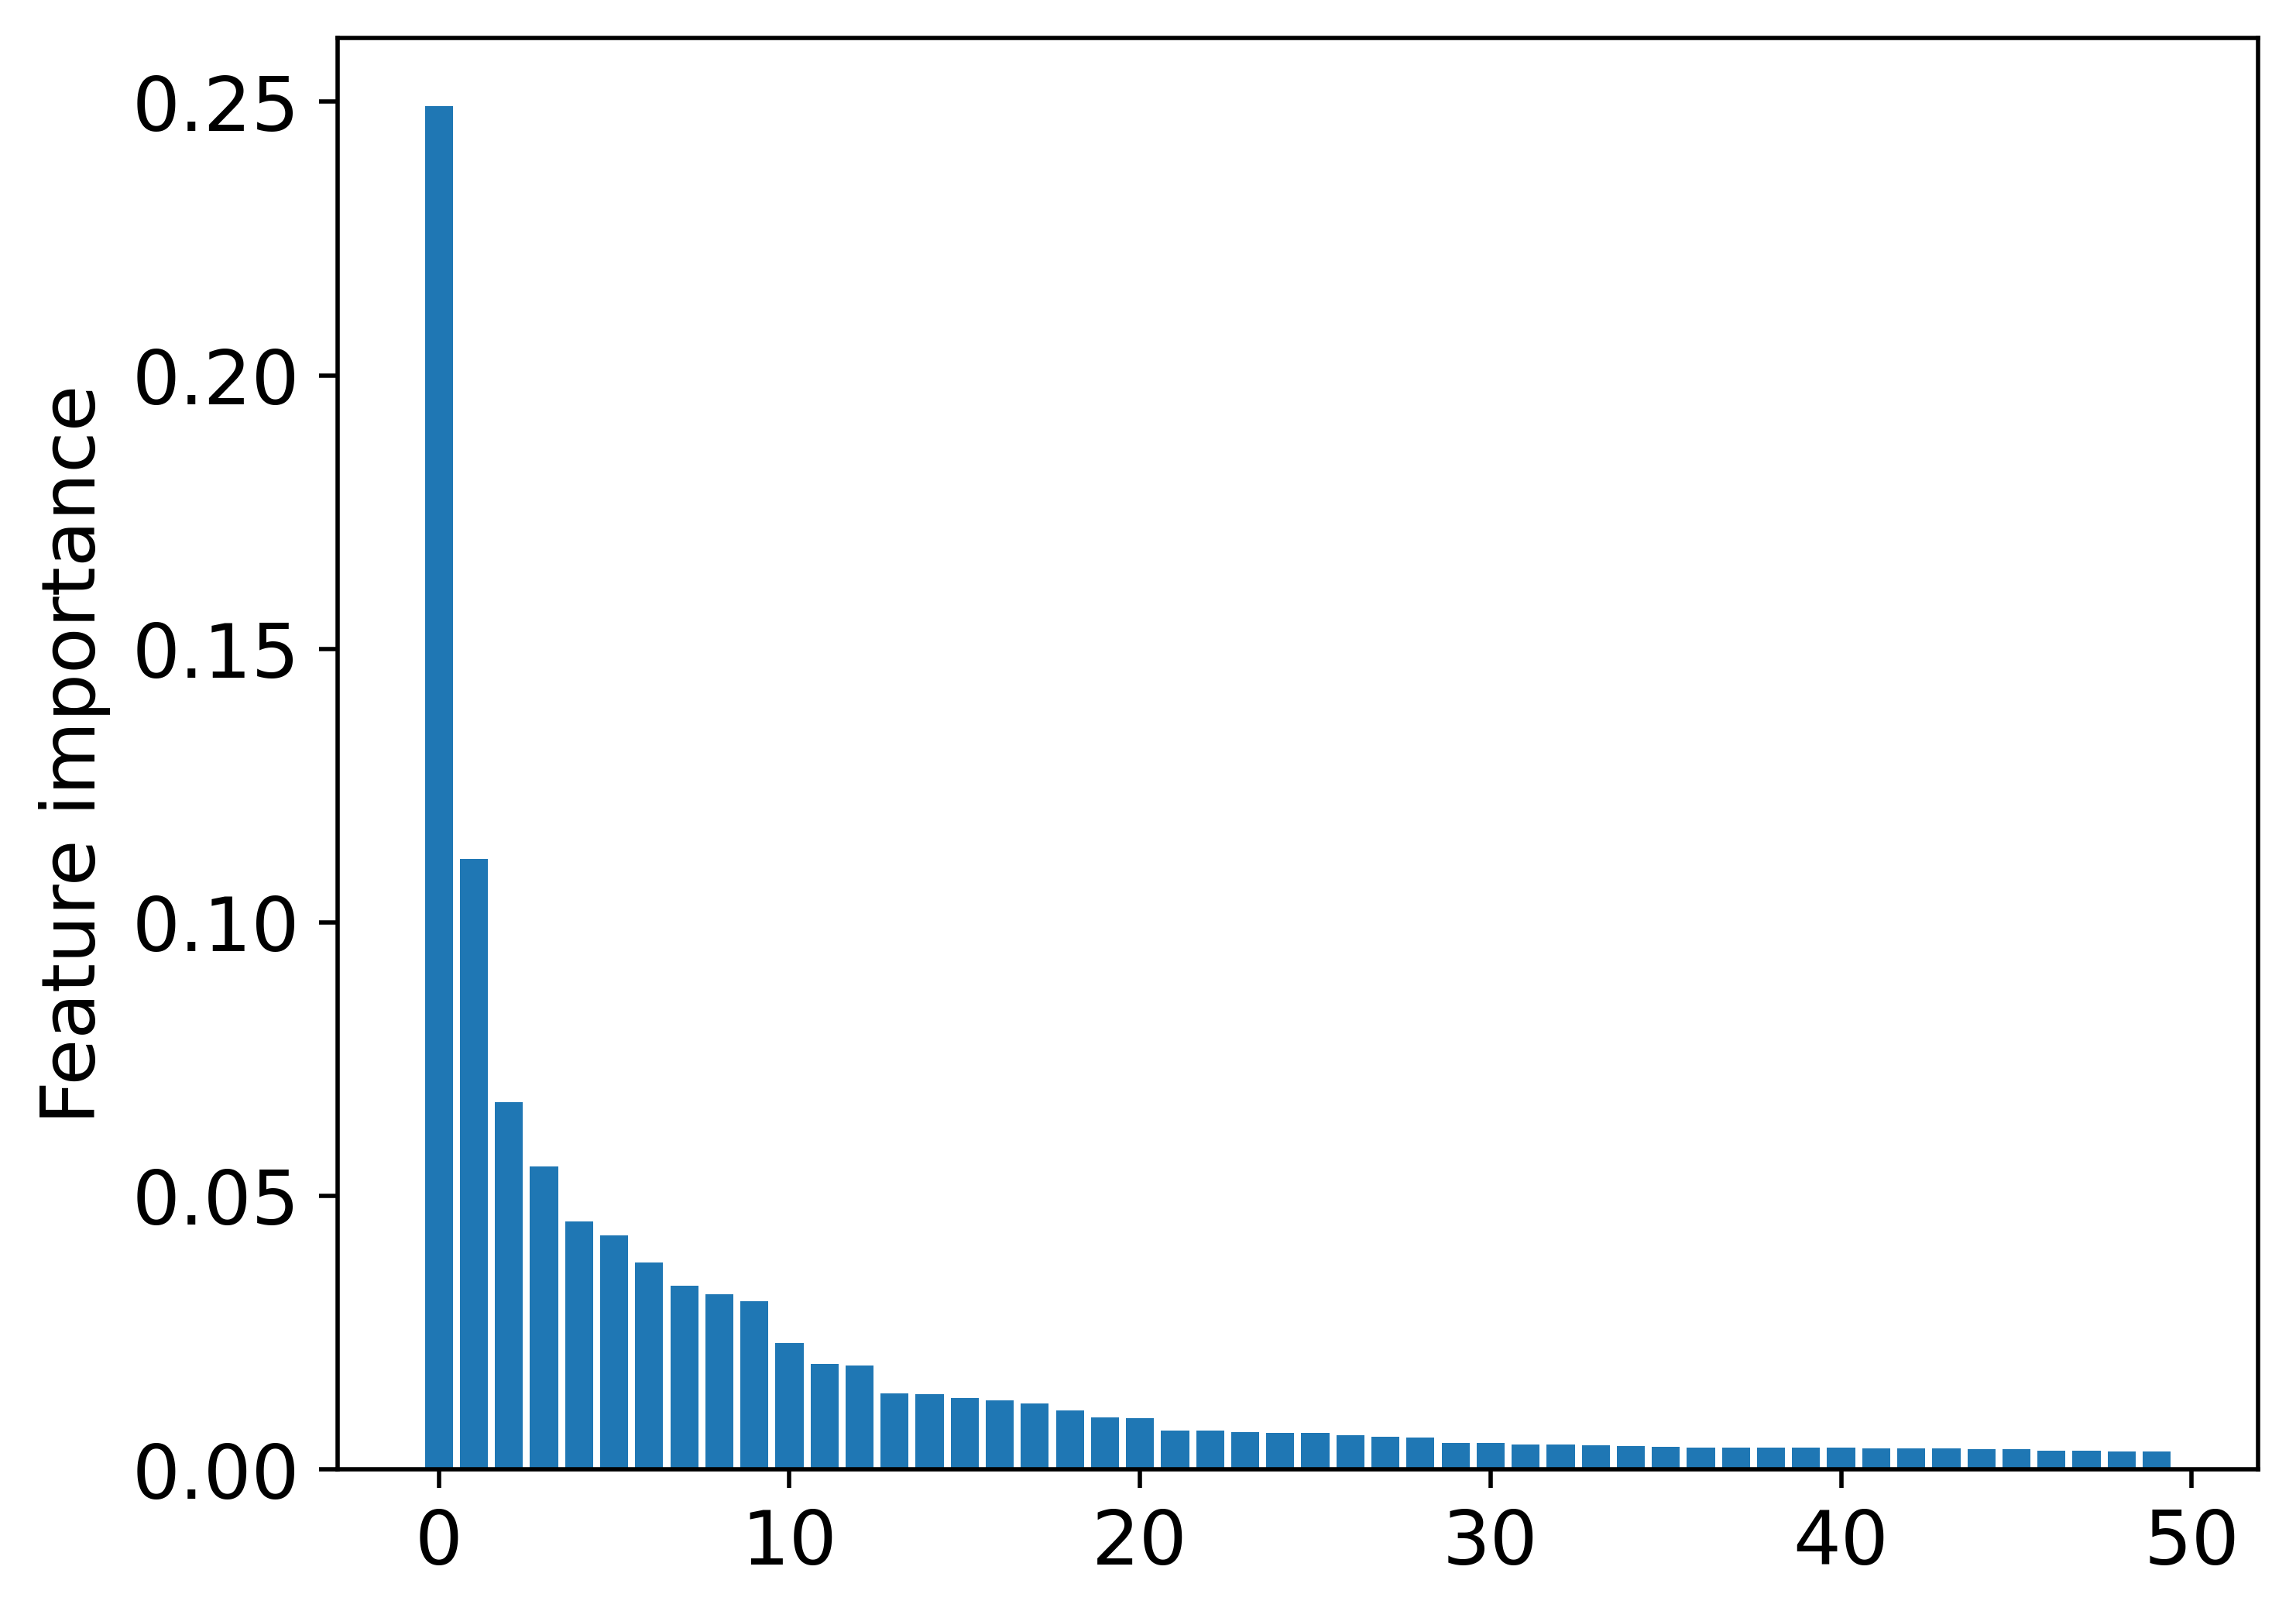

In [ ]:
indices = np.argsort(importances)[::-1]

plt.ylabel('Feature importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

<Axes: >

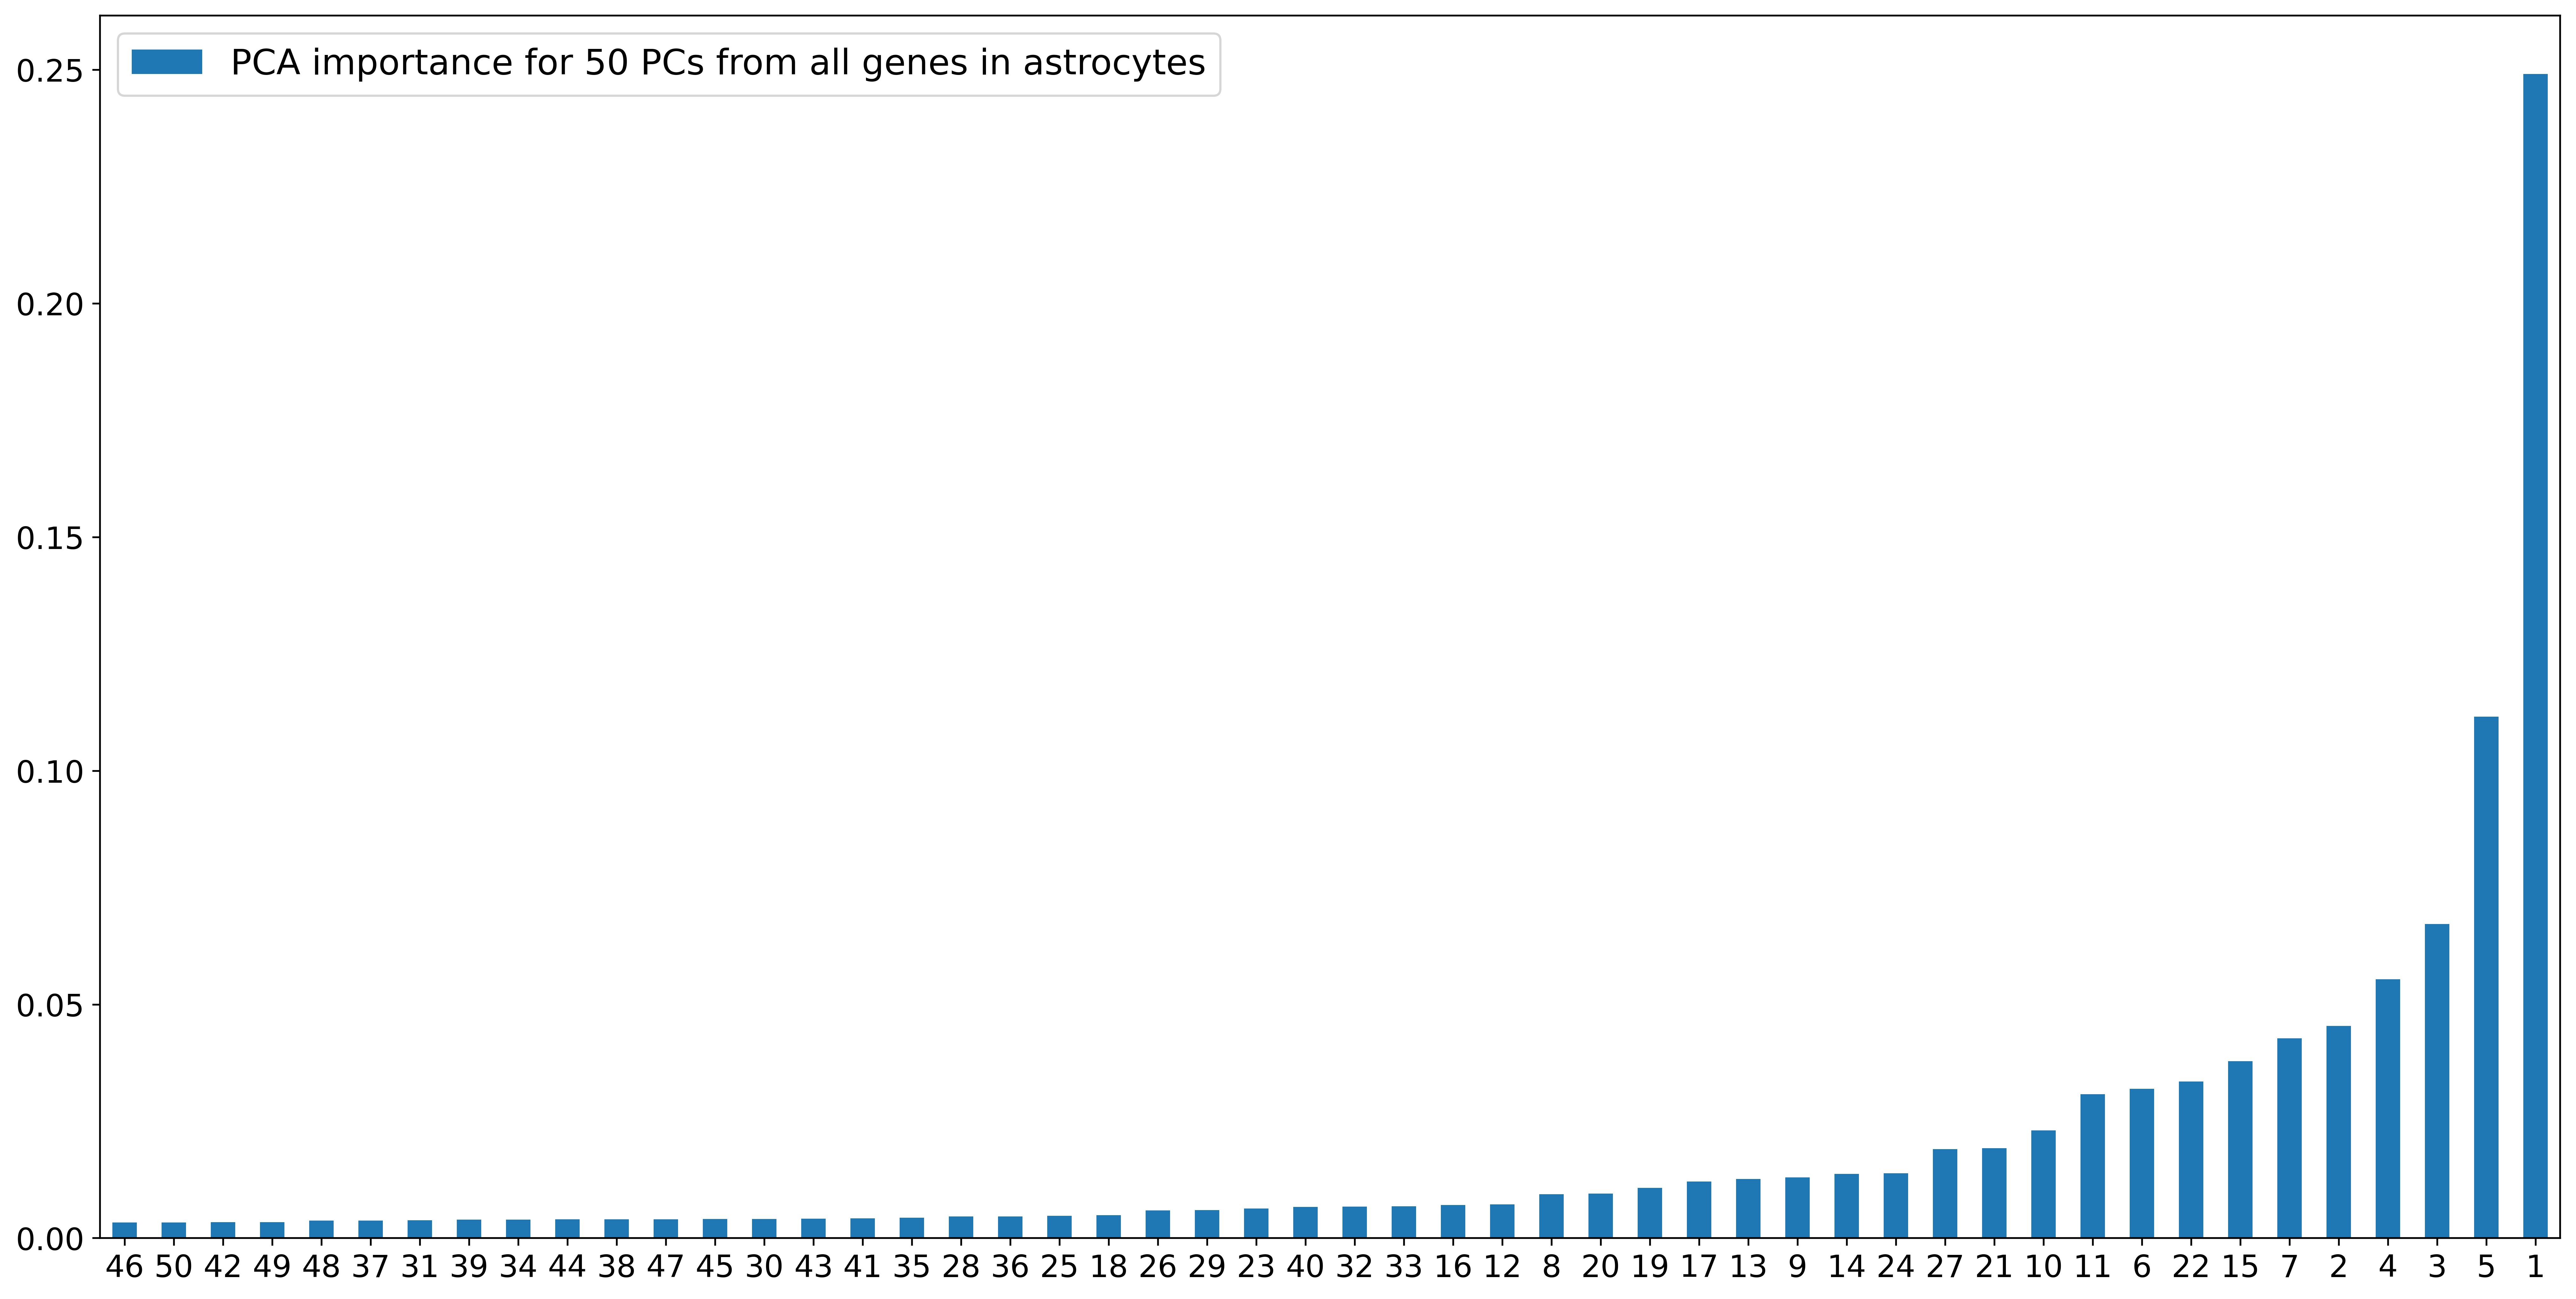

In [ ]:
'''Feature importance using MDI'''
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns+1, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair

imp = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'PCA importance for 50 PCs from all genes in astrocytes'})
imp.sort_values(by='PCA importance for 50 PCs from all genes in astrocytes').plot(kind='bar', figsize=(20, 10), rot=0)

(50,)
(10,)


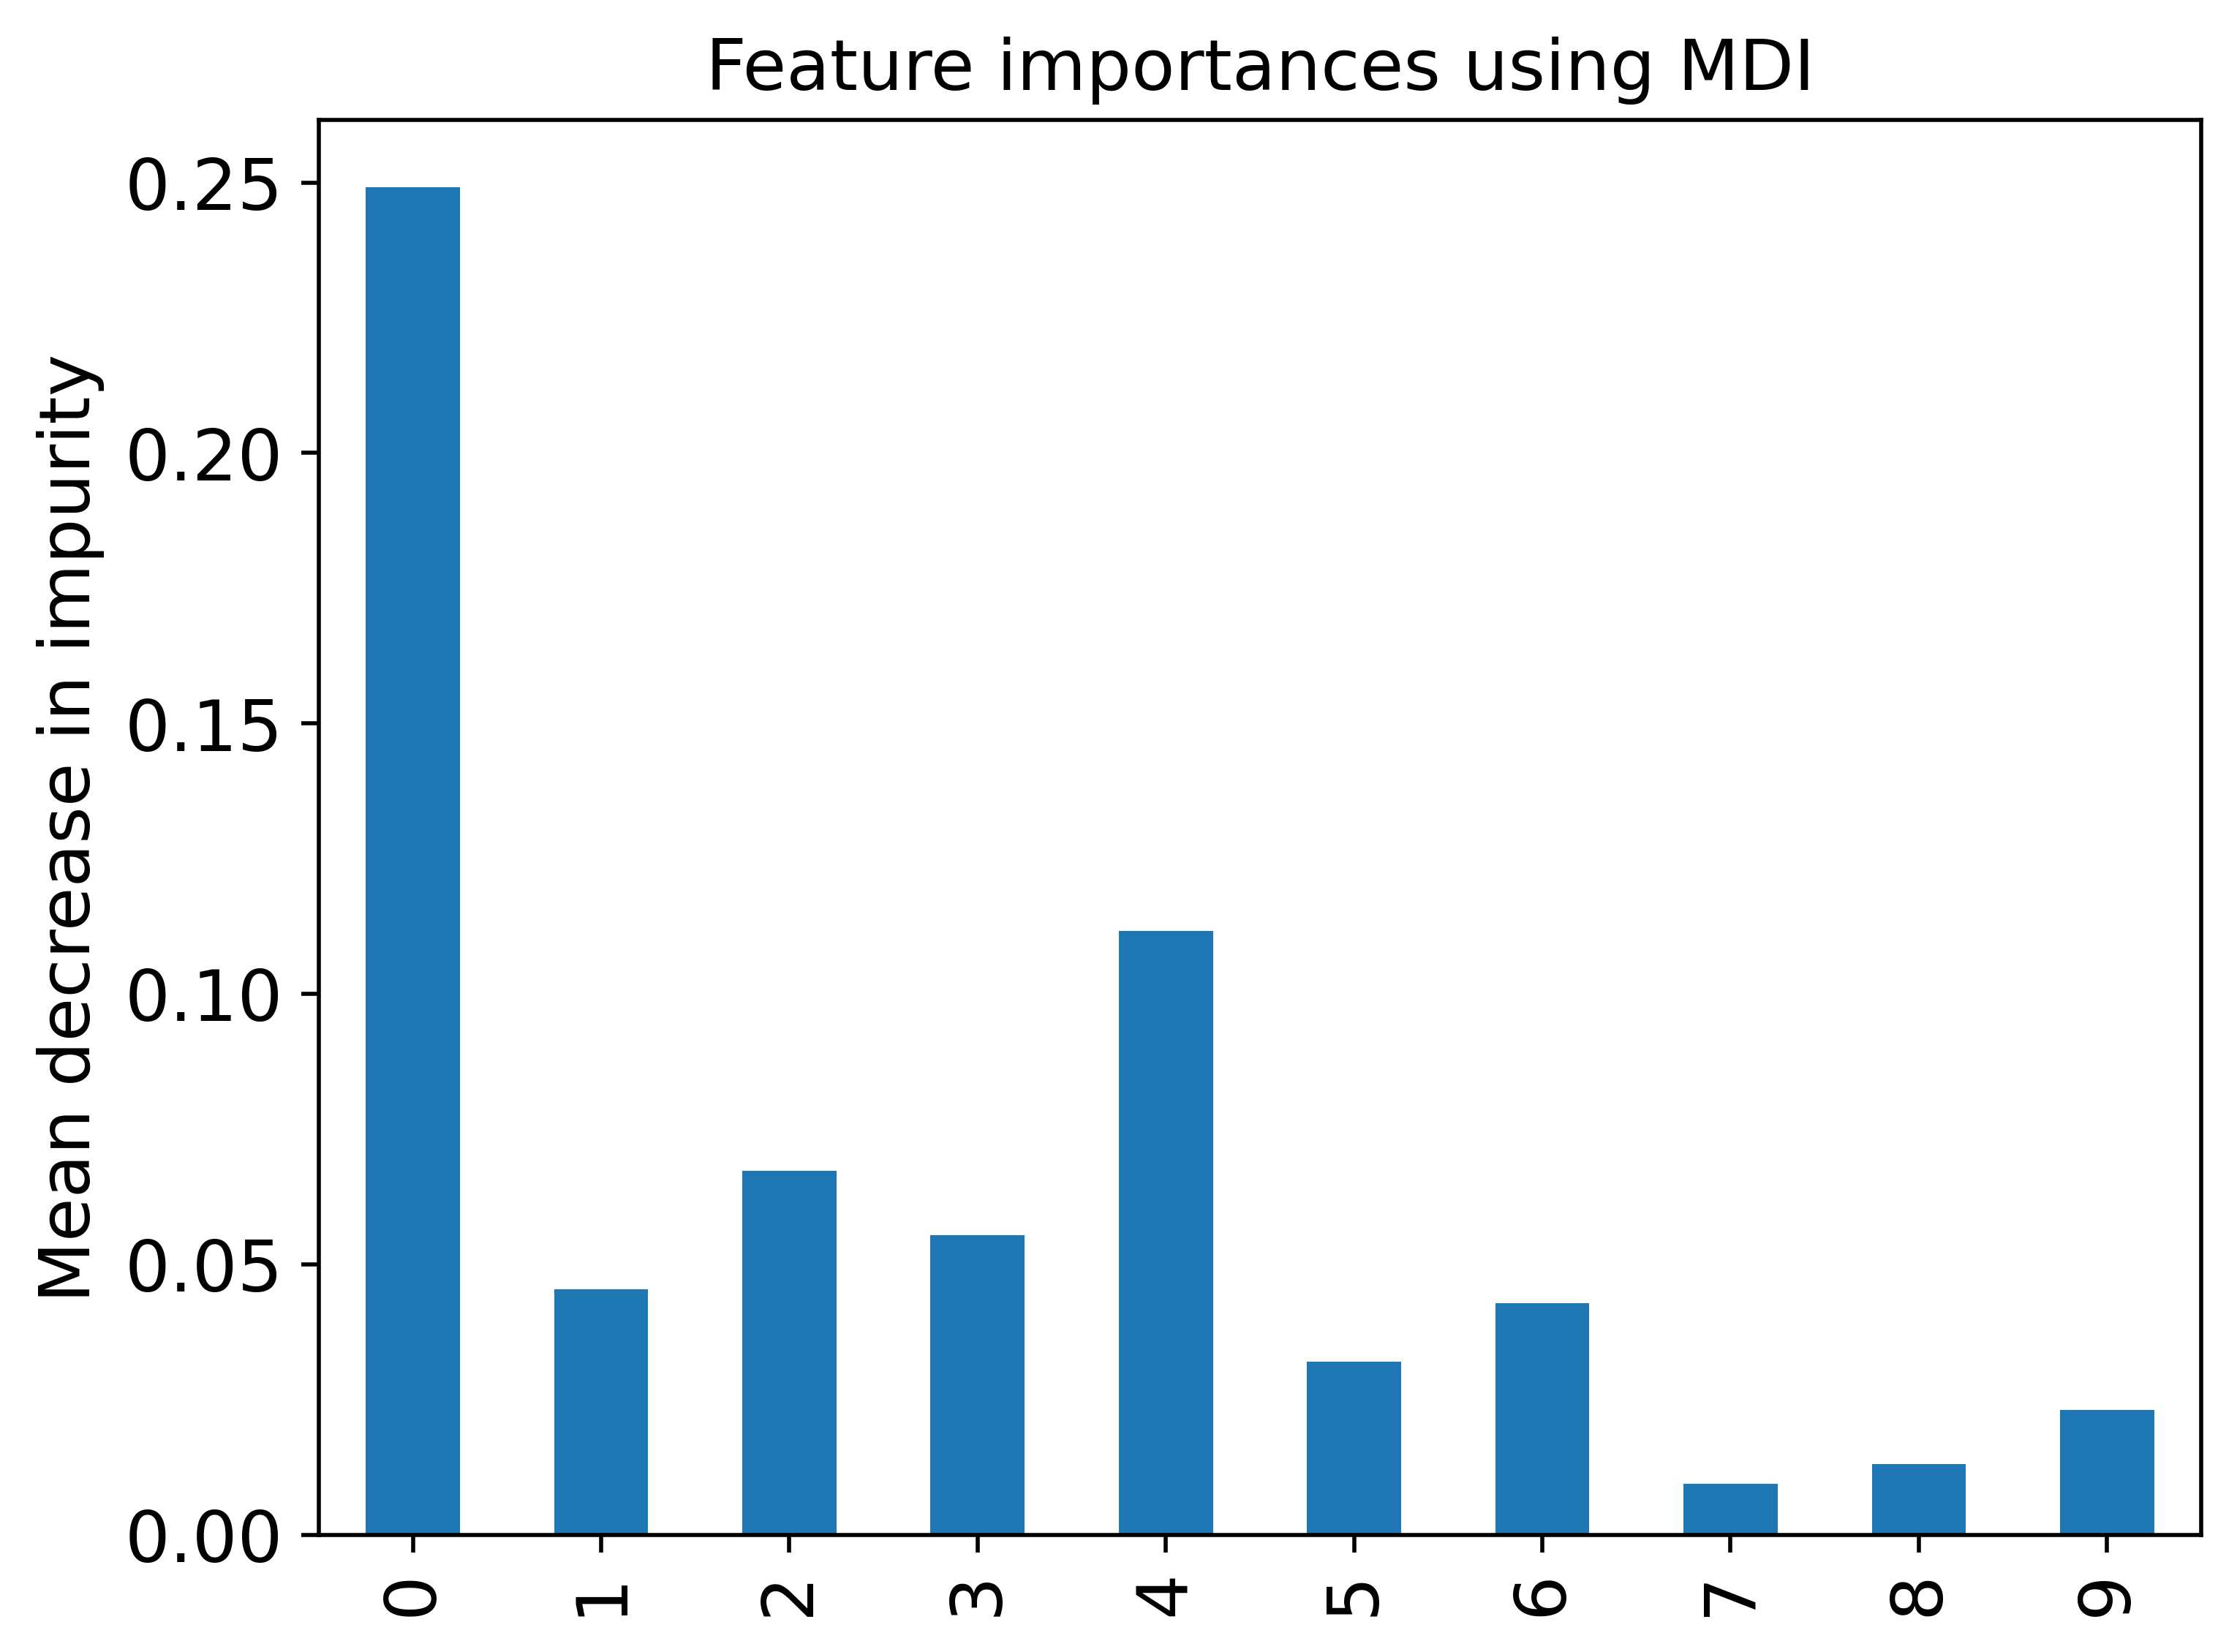

In [ ]:
import pandas as pd
forest_importances = pd.Series(importances, index=None) #series containing importances of each feature
print(forest_importances.shape)
top_importances = forest_importances.take([0,1,2,3,4,5,6,7,8,9], axis = 0) #take the top ten importances from the pandas series
print(top_importances.shape)

fig, ax = plt.subplots()
top_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**Permutation feature importance**: The permutation feature importance is defined to compute how much each feature contributes to decreasing the weighted impurity. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. [Check out full explanation here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

https://www.datacamp.com/tutorial/random-forests-classifier-python

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test_global, y_test_global, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 53.603 seconds


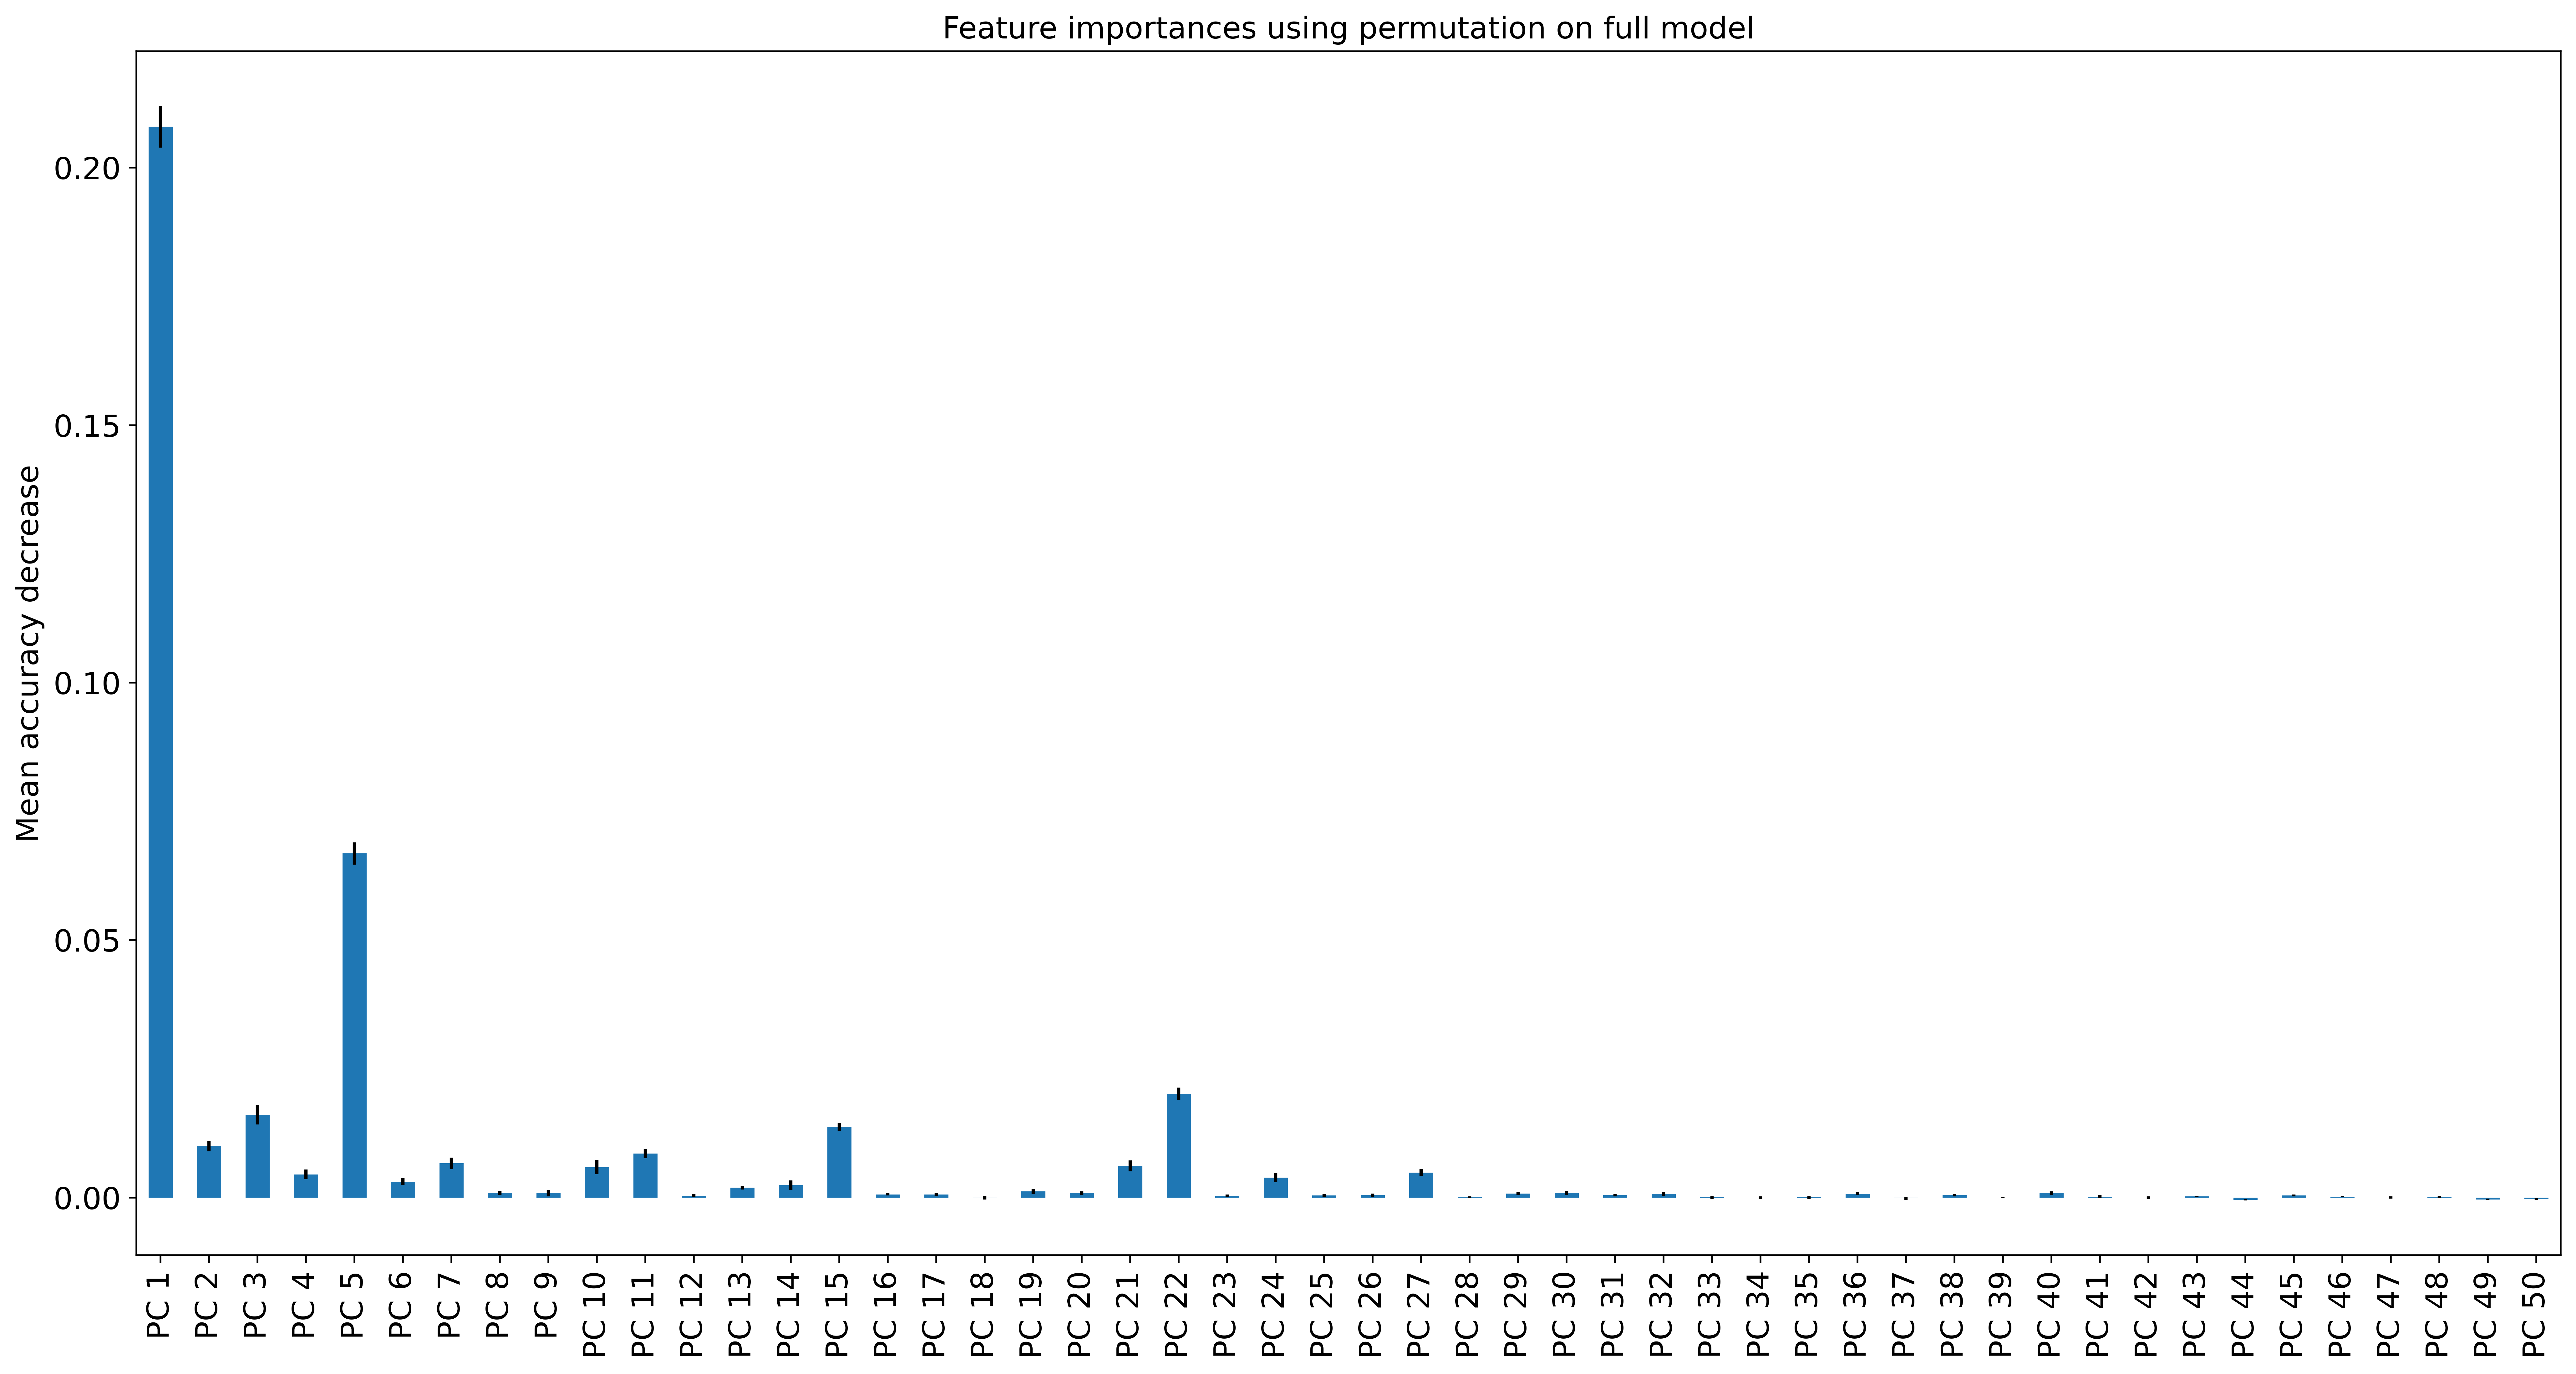

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax, figsize=(20, 10))
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
#fig.tight_layout()
plt.show()

In [ ]:
'''Random Piece of code'''
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

rf.feature_importances_

array([0.41009914, 0.08392939, 0.08956149, 0.01277465, 0.09737525,
       0.01640661, 0.01684695, 0.00452108, 0.00722834, 0.01263647,
       0.01221189, 0.0023266 , 0.00703459, 0.00719315, 0.05872523,
       0.00319403, 0.00488831, 0.00335213, 0.01055489, 0.0042202 ,
       0.01612488, 0.04133574, 0.00171378, 0.00881618, 0.00180689,
       0.00337032, 0.01735054, 0.00179941, 0.00354321, 0.00253696,
       0.00127458, 0.00527269, 0.00362416, 0.00206539, 0.00184011,
       0.00174222, 0.00160288, 0.00159078, 0.00145095, 0.00206742,
       0.0013061 , 0.00125831, 0.0018573 , 0.00116461, 0.00118918,
       0.00163811, 0.00152181, 0.00111444, 0.00151841, 0.00142226])

In [ ]:
y_test_global

740      1
31300    1
11975    0
14722    1
31040    0
        ..
1824     0
23737    0
12951    0
25122    1
22711    0
Name: disease__ontology_label, Length: 5004, dtype: category
Categories (2, object): ['1', '0']

In [ ]:
# Make predictions on the test data
y_pred = rf.predict(X_test_global)
y_pred.astype(int)
y_test_global.astype(int)
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_global, y_pred)
print("Mean Squared Error:", mse)

TypeError: ignored

In [ ]:
perm_importance = permutation_importance(forest, X_test_global, y_test_global)

In [ ]:
perm_importance

{'importances_mean': array([ 2.03517186e-01,  1.00719424e-02,  1.64268585e-02,  5.07593925e-03,
         6.58273381e-02,  2.91766587e-03,  6.79456435e-03,  7.59392486e-04,
         9.19264588e-04,  5.47561950e-03,  8.87290168e-03,  3.59712230e-04,
         2.15827338e-03,  2.99760192e-03,  1.48681055e-02,  7.19424460e-04,
         7.99360512e-04, -7.99360512e-05,  1.23900879e-03,  9.99200639e-04,
         6.11510791e-03,  2.04236611e-02,  5.19584333e-04,  3.43725020e-03,
         7.99360512e-04,  6.39488409e-04,  4.63629097e-03, -2.22044605e-17,
         1.15907274e-03,  8.39328537e-04,  4.79616307e-04,  6.79456435e-04,
        -3.99680256e-05,  7.99360512e-05,  3.99680256e-05,  7.19424460e-04,
        -1.59872102e-04,  3.59712230e-04,  7.99360512e-05,  1.07913669e-03,
         5.19584333e-04,  2.39808153e-04,  1.59872102e-04, -3.99680256e-04,
         3.59712230e-04,  2.39808153e-04, -1.99840128e-04,  2.79776179e-04,
        -2.79776179e-04, -1.59872102e-04]),
 'importances_std': arra

**Get Support: Here, rank genes' contribution to PCs.**

In [ ]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(RandomForestClassifier(n_estimators = 100))

In [ ]:
select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

 Get the integer index of the features selected. If indices is False, this is a boolean array of shape `[# input features]`, in which an element is True iff its corresponding feature is selected for retention. If indices is True, this is an integer array of shape `[# output features] `whose values are indices into the input feature vector.

In [ ]:
select.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [ ]:
selected_feat= X_train.columns[(select.get_support())] #look for indexes selected features in the X_train columns.
print(len(selected_feat)) #gives number of selected features
selected_feat = selected_feat+1
print(selected_feat) #gives indexes + 1 of selected features shown by PC(i)

11
Int64Index([1, 2, 3, 4, 5, 6, 7, 10, 11, 15, 22], dtype='int64')


In [ ]:
selected_feat = selected_feat.to_numpy() #convert the list into a numpy array
print(selected_feat) #this array starts from i = 0, but in scanpy the index starts from i = 1

[ 1  2  3  4  5  6  7 10 11 15 22]


Plot the most used genes from each of the selected features(PCs). Parameters are adjustable (ex. can change n_points to show all or selected number of genes)

In [ ]:
fig = sc.pl.pca_loadings(adata_m1, components = selected_feat, include_lowest = True, n_points = 40, save ='most_used_genes.png' )

Rank genes according to contributions to PCs.

In [ ]:
# Access the gene names associated with the PCs
gene_names = adata_m1.var_names
print(gene_names)

Index(['RP11-34P13.7', 'AP006222.2', 'RP4-669L17.10', 'RP5-857K21.4',
       'RP5-857K21.2', 'RP11-206L10.9', 'FAM87B', 'LINC00115', 'FAM41C',
       'RP11-54O7.16',
       ...
       'RNU2-62P', 'RNU4-42P', 'RN7SKP262', 'RNU6-384P', 'RNU6-893P',
       'RN7SL158P', 'RNU2-41P', 'AC090673.1', 'RNU4-67P', 'RNU6-210P'],
      dtype='object', length=30738)


In [ ]:
pd.DataFrame(adata_m1.varm['PCs'])

0         1         2         3         4         5         6   \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     -0.007016  0.011554  0.005841 -0.002741 -0.021338  0.000764  0.011594   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
30733  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
30734  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
30735  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
30736  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
30737  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

             7         8         9   ...        40        41        42  \
0      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3     -0.005981  0.000644  0.000781  ... -0.005267 -0.011476 -0.008468   
4      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
...         ...       ...       ...  ...       ...       ...       ...   
30733  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
30734  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
30735  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
30736  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
30737  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

             43        44       45        46        47        48       49  
0      0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.00000  
1      0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.00000  
2      0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.00000  
3      0.020737 -0.025061  0.01718 -0.001186 -0.001749  0.006752 -0.01149  
4      0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.00000  
...         ...       ...      ...       ...       ...       ...      ...  
30733  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.00000  
30734  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.00000  
30735  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.00000  
30736  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.00000  
30737  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.00000  

[30738 rows x 50 columns]

In [ ]:
# Retrieve the gene names for the first PC
'''
return the indices order that would place the original array values in descending order
arr = np.array([3, 1, 5, 2, 4])
sorted_indices = arr.argsort()[::-1]
print(sorted_indices)
[2 4 0 3 1]
'''
pc1_gene_names = gene_names[np.abs(adata_m1.varm['PCs'][0]).argsort()[::-1]]
pc1_gene_names = pd.DataFrame(pc1_gene_names)

In [ ]:
pc1_gene_names

0
0            VWA1
1          SAMD11
2        C1orf159
3          RNF223
4            AGRN
5    RP11-54O7.11
6           ISG15
7            HES4
8    RP11-54O7.17
9         PLEKHN1
10         KLHL17
11          NOC2L
12    RP11-54O7.3
13  RP4-758J18.10
14    RP11-54O7.1
15   RP11-54O7.16
16         FAM41C
17      LINC00115
18         FAM87B
19  RP11-206L10.9
20   RP5-857K21.2
21   RP5-857K21.4
22  RP4-669L17.10
23     AP006222.2
24  RP11-465B22.8
25     TTLL10-AS1
26         TTLL10
27       TNFRSF18
28        TMEM88B
29   RP4-758J18.7
30        ANKRD65
31  RP4-758J18.13
32         MRPL20
33          CCNL2
34       AURKAIP1
35          MXRA8
36           DVL1
37         TAS1R3
38         CPSF3L
39          PUSL1
40          ACAP3
41         SCNN1D
42   RP5-902P8.10
43         UBE2J2
44   RP5-902P8.12
45        FAM132A
46        B3GALT6
47           SDF4
48        TNFRSF4
49   RP11-34P13.7

In [ ]:
pc1_gene_loadings = gene_names[np.abs(adata_m1.varm['PCs'][0]).argsort()[::-1]]

###**Experiment 2. Random Forest Importance in DA neuronz (method 1)**

In [ ]:
!pip3 install scanpy
import numpy as np
import pandas as pd
import scanpy as sc
import random
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import importlib
required_libraries = ['torch', 'torchvision', 'PIL', 'matplotlib',
                      'numpy', 'pandas']
# for lib in required_libraries:
#     if importlib.util.find_spec(lib) is None:
#         print("%s unavailable" % lib)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import TensorDataset

In [ ]:
#0. Model methods import
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
adata_m1 = sc.read_h5ad("drive/MyDrive/scRNA ML classifier/data_objects_May_2022/DAN_PC_all_genes_qc.h5ad")
adata_m2 = sc.read_h5ad("drive/MyDrive/scRNA ML classifier/data_objects_May_2022/DAN_PC_HVGs_qc.h5ad")
adata_m3 = sc.read_h5ad("drive/MyDrive/scRNA ML classifier/data_objects_May_2022/DAN_no_PC_HVGs_qc.h5ad")

data_list = [adata_m1, adata_m2, adata_m3]

In [ ]:
#0. Define Logistic Regression Model
def randomForestTest():

  use_gpu = torch.cuda.is_available()
  device = torch.device("cuda:0" if use_gpu else "cpu")

  forest = RandomForestClassifier(random_state=0,n_estimators = 100)
  forest.fit(X_train, y_train)

  prediction_test = forest.predict(X_test_global)

  #test accruacy
  accuracy_test = accuracy_score(y_test_global, prediction_test)
  print("Test acc = ", accuracy_test)

  return prediction_test, accuracy_test, forest

In [ ]:
def plot(y_test, prediction_test):
  confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)
  cmd = ConfusionMatrixDisplay(confusion_matrix, display_labels=['Healthy','PD'])
  cmd.plot(cmap = 'YlGnBu', colorbar = False)

  plt.grid(False)

  fig = cmd.ax_.get_figure()
  fig.set_figwidth(3)
  fig.set_figheight(3)
  plt.rcParams["figure.dpi"] = 500
  plt.rcParams["axes.labelcolor"] = 'black' #now useless

  plt.rc('font', size=16)
  # Set the axes title font size
  plt.rc('axes', titlesize=14)
  # Set the axes labels font size
  plt.rc('axes', labelsize=14)
  # Set the font size for x tick labels
  plt.rc('xtick', labelsize=14)
  # Set the font size for y tick labels
  plt.rc('ytick', labelsize=14)
  #plt.savefig(dpi = 300, fname = 'astro_LR.png')

In [ ]:
if 'X_pca' in adata_m1.obsm:
  X = pd.DataFrame(adata_m1.obsm['X_pca'].X)
else:
  X = adata_m1.X

y = adata_m1.obs['disease__ontology_label'].replace({"normal": "0", "Parkinson disease": "1"})

#2. Train-test split: 60/20/20. Random_state is the seed.Validation used for hyperparameter tuning.
#   Parameters for the highest accuracy can be used for test set.

X_train, X_test_global, y_train, y_test_global = train_test_split(X, y, test_size=0.2, random_state=0) #test is always the same
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

prediction_test, accuracy_test, forest = randomForestTest()
plot(y_test_global, prediction_test)

**feature importance YouTube**

In [ ]:
'''not good '''
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

plt.ylabel('Feature importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

feat_labels = [f"feature {i+1}" for i in range(X.shape[1])]
plt.xticks(range(X_train.shape[1]),
            rotation=0)

plt.xlim([-1, X_train.shape[1]])

# plt.tight_layout()
plt.savefig('feature-importance.pdf', dpi=300)
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
forest.feature_importances_

In [ ]:
feature_names = [f"PC {i+1}" for i in range(X.shape[1])]
print(feature_names)

In [ ]:
# Print feature importances in the order of feature names
for feature_name, importance in zip(feature_names, importances):
    print(f"{feature_name}: {importance}")

In [ ]:
# List1
name = feature_names
# List2
imp = forest.feature_importances_

# get the list of tuples from two lists.
# and merge them by using zip().
list_of_tuples = list(zip(name, imp))

# Assign data to tuples.
list_of_tuples
df = pd.DataFrame(list_of_tuples, columns = ['Feature', 'forest.feature_importances_'])

# Print data.
df

This part of code looks at feature importances using the scikit learn method.

---

**Feature importance based on mean decrease in impurity**: This approach directly measures feature importance by observing how random re-shuffling (thus preserving the distribution of the variable) of each predictor influences model performance.

In [ ]:
index = X.columns
print(index) #feature name is a list of indexes

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

This part of code ranks the 50 PCs from least important to most important. You can compare this with the plot of PCs from above.

In [ ]:
indices = np.argsort(importances)[::-1]

plt.ylabel('Feature importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

In [ ]:
'''Feature importance using MDI'''
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns+1, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair

imp = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'PCA importance for 50 PCs from all genes in dopaminergic neurons'})
imp.sort_values(by='PCA importance for 50 PCs from all genes in dopaminergic neurons').plot(kind='bar', figsize=(20, 10), rot=0)

In [ ]:
import pandas as pd
forest_importances = pd.Series(importances, index=None) #series containing importances of each feature
print(forest_importances.shape)
top_importances = forest_importances.take([0,1,2,3,4,5,6,7,8,9], axis = 0) #take the top ten importances from the pandas series
print(top_importances.shape)

fig, ax = plt.subplots()
top_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**Permutation feature importance**: The permutation feature importance is defined to compute how much each feature contributes to decreasing the weighted impurity. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. [Check out full explanation here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

https://www.datacamp.com/tutorial/random-forests-classifier-python

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test_global, y_test_global, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax, figsize=(20, 10))
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
#fig.tight_layout()
plt.show()

In [ ]:
'''Random Piece of code'''
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

rf.feature_importances_

In [ ]:
y_test_global

In [ ]:
# Make predictions on the test data
y_pred = rf.predict(X_test_global)
y_pred.astype(int)
y_test_global.astype(int)
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_global, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
perm_importance = permutation_importance(forest, X_test_global, y_test_global)

In [ ]:
perm_importance

**Get Support: Here, rank genes' contribution to PCs.**

In [ ]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(RandomForestClassifier(n_estimators = 100))

In [ ]:
select.fit(X_train, y_train)

 Get the integer index of the features selected. If indices is False, this is a boolean array of shape `[# input features]`, in which an element is True iff its corresponding feature is selected for retention. If indices is True, this is an integer array of shape `[# output features] `whose values are indices into the input feature vector.

In [ ]:
select.get_support()

In [ ]:
selected_feat= X_train.columns[(select.get_support())] #look for indexes selected features in the X_train columns.
print(len(selected_feat)) #gives number of selected features
selected_feat = selected_feat+1
print(selected_feat) #gives indexes + 1 of selected features shown by PC(i)

In [ ]:
selected_feat = selected_feat.to_numpy() #convert the list into a numpy array
print(selected_feat) #this array starts from i = 0, but in scanpy the index starts from i = 1

Plot the most used genes from each of the selected features(PCs). Parameters are adjustable (ex. can change n_points to show all or selected number of genes)

In [ ]:
fig = sc.pl.pca_loadings(adata_m1, components = selected_feat, include_lowest = True, n_points = 40, save ='most_used_genes.png' )

Rank genes according to contributions to PCs.

In [ ]:
# Access the gene names associated with the PCs
gene_names = adata_m1.var_names
print(gene_names)

In [ ]:
pd.DataFrame(adata_m1.varm['PCs'])

In [ ]:
# Retrieve the gene names for the first PC
'''
return the indices order that would place the original array values in descending order
arr = np.array([3, 1, 5, 2, 4])
sorted_indices = arr.argsort()[::-1]
print(sorted_indices)
[2 4 0 3 1]
'''
pc1_gene_names = gene_names[np.abs(adata_m1.varm['PCs'][0]).argsort()[::-1]]
pc1_gene_names = pd.DataFrame(pc1_gene_names)

In [ ]:
pc1_gene_names

In [ ]:
pc1_gene_loadings = gene_names[np.abs(adata_m1.varm['PCs'][0]).argsort()[::-1]]

###**Experiment 3. Random Forest Repetition (method 1)**
Run the random forest classifier 10 times to output important genes.

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
import random

In [ ]:
from random import randi

In [ ]:
for i in range(3):

  if 'X_pca' in adata_m1.obsm:
    X = pd.DataFrame(adata_m1.obsm['X_pca'].X)
  else:
    X = adata_m1.X

  y = adata_m1.obs['disease__ontology_label'].replace({"normal": "0", "Parkinson disease": "1"})

  #2. Train-test split: 60/20/20. Random_state is the seed.Validation used for hyperparameter tuning.
  #   Parameters for the highest accuracy can be used for test set.

  X_train, X_test_global, y_train, y_test_global = train_test_split(X, y, test_size=0.2, random_state=0) #test is always the same
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=random.randint(1111,9999))

  prediction_test, accuracy_test, forest = randomForestTest()

  feature_names = [f"PC {i+1}" for i in range(X.shape[1])]
  # List1
  name = feature_names
  # List2
  imp = forest.feature_importances_

  # get the list of tuples from two lists.
  # and merge them by using zip().
  list_of_tuples = list(zip(name, imp))

  # Assign data to tuples.
  list_of_tuples
  df = pd.DataFrame(list_of_tuples, columns = ['Feature', 'forest.feature_importances_'])

  # Print data.
  print(df)


  select = SelectFromModel(RandomForestClassifier(n_estimators = 100))
  select.fit(X_train, y_train)
  select.get_support()

  selected_feat= X_train.columns[(select.get_support())] #look for indexes selected features in the X_train columns.
  print(len(selected_feat)) #gives number of selected features
  selected_feat = selected_feat+1
  print(selected_feat) #gives indexes + 1 of selected features shown by PC(i)
  selected_feat = selected_feat.to_numpy() #convert the list into a numpy array

  fig = sc.pl.pca_loadings(adata_m1, components = selected_feat, include_lowest = True, n_points = 40, save ='most_used_genes.png' )

  gene_names = adata_m1.var_names
  pc1_gene_names = gene_names[np.abs(adata_m1.varm['PCs'][0]).argsort()[::-1]]
  pc1_gene_names = pd.DataFrame(pc1_gene_names)
  print(pc1_gene_names)
  #plot(y_test_global, prediction_test)

###**Experiment 4. Random Forest Importance in Astrocytes (method 3)**

In [ ]:
adata_m3.X

In [ ]:
gene_expression_data = adata_m3.X

In [ ]:
gene_names = adata_m3.var_names

In [ ]:
if 'X_pca' in adata_m3.obsm:
  X = pd.DataFrame(adata_m3.obsm['X_pca'].X)
else:
  X = adata_m3.X

y = adata_m3.obs['disease__ontology_label'].replace({"normal": "0", "Parkinson disease": "1"})

#2. Train-test split: 60/20/20. Random_state is the seed.Validation used for hyperparameter tuning.
#   Parameters for the highest accuracy can be used for test set.

X_train, X_test_global, y_train, y_test_global = train_test_split(X, y, test_size=0.2, random_state=0) #test is always the same
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

prediction_test, accuracy_test, forest = randomForestTest()
plot(y_test_global, prediction_test)

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
feature_importances = forest.feature_importances_

In [ ]:
# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
# Select the top-ranked genes as important genes
num_selected_genes = 100  # Specify the number of important genes to select
selected_genes = gene_names[sorted_indices[:num_selected_genes]]  # Assuming you have gene names stored in gene_names
selected_gene_importances = feature_importances[sorted_indices[:num_selected_genes]]
# Print or further process the selected important genes
print(selected_genes)
# Create a dataframe from the selected genes and their importances
df = pd.DataFrame({'Gene': selected_genes, 'Importance': selected_gene_importances})
# Print the dataframe
print(df)

In [ ]:
df

In [ ]:
for gene, importance in zip(selected_genes, selected_gene_importances):
    print(gene, ":", importance)